<a href="https://colab.research.google.com/github/DanielCaffe/FASE-5-Cap-1---FarmTech-na-era-da-cloud-computing/blob/main/Daniel_Caff%C3%A9_RM564440_Enrico_RM561352_Davi_RM566336_Ednilton_RM66069_FASE_5_Cap_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto Fase 5 cap 1: FarmTech na era da cloud computing**

nomes e rms:


##**Etapa 1: Análise Exploratória de Dados**

In [ ]:
# Importando as bibliotecas necessárias para a primeira análise
import pandas as pd
import numpy as np

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [ ]:
# Carregando o dataset
# O arquivo 'crop_yield.csv' deve estar na mesma pasta que este notebook
df = pd.read_csv('crop_yield.csv')

# Exibindo as 5 primeiras linhas para verificar se os dados foram carregados corretamente
df.head()

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


In [ ]:
# Verificando as informações gerais do DataFrame (tipos de dados, valores nulos)
print("Informações do DataFrame:")
df.info()

print("\n" + "="*50 + "\n") # Apenas para separar as saídas

# Exibindo estatísticas descritivas para as colunas numéricas
print("Estatísticas Descritivas:")
df.describe()

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


Estatísticas Descritivas:


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


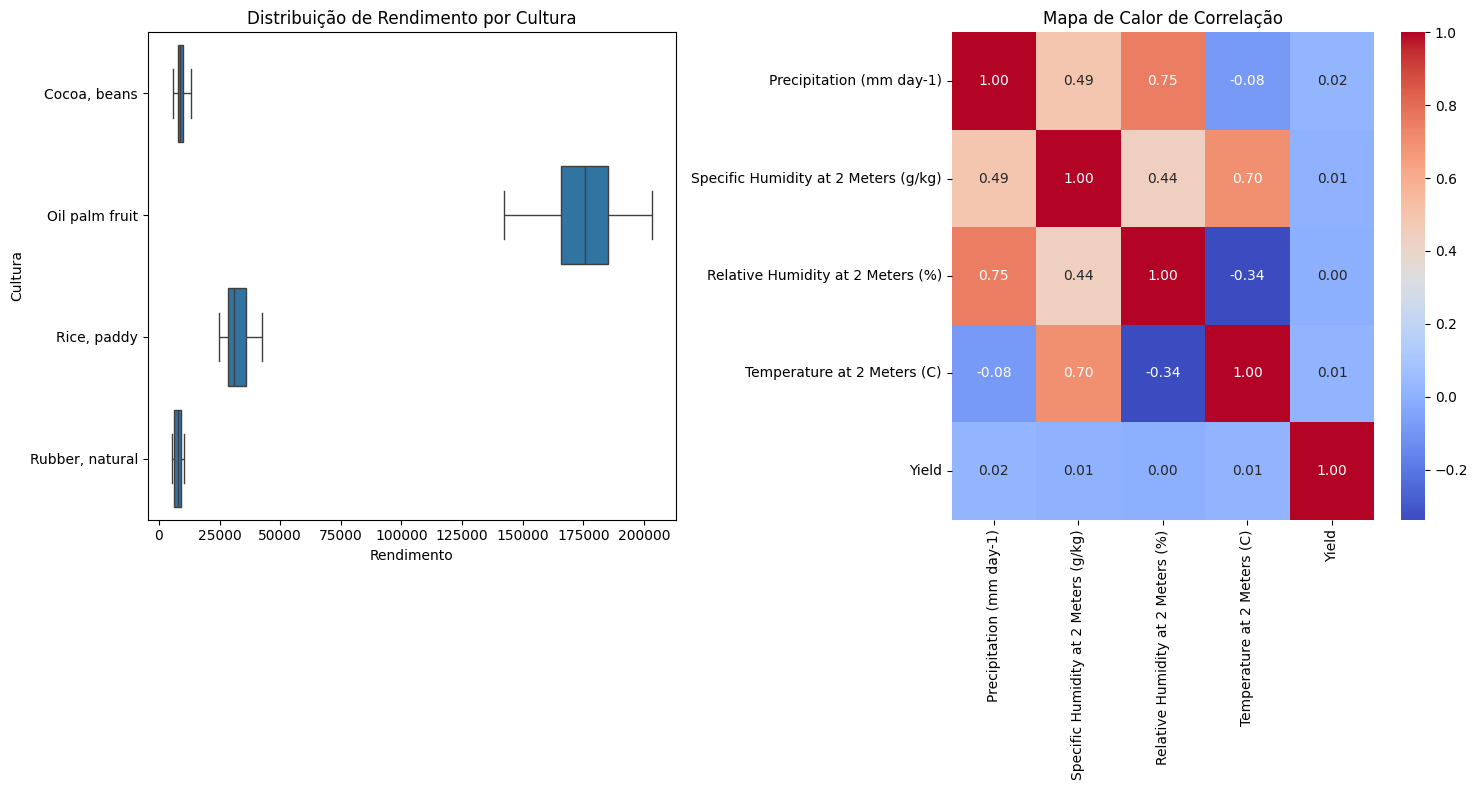

In [ ]:
# Configurando o tamanho da figura para os novos gráficos
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

# Gráfico 4: Boxplot de Rendimento por Cultura
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
sns.boxplot(x='Yield', y='Crop', data=df)
plt.title('Distribuição de Rendimento por Cultura')
plt.xlabel('Rendimento')
plt.ylabel('Cultura')

# Gráfico 5: Mapa de Calor da Correlação
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
# Precisamos calcular a correlação apenas das colunas numéricas
corr_matrix = df.drop('Crop', axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlação')

# Ajusta o layout e exibe os gráficos
plt.tight_layout()
plt.show()

## **Etapa 2: Pré-processamento dos Dados para Modelagem**

1.  Converter a coluna categórica crop em um formato numérico usando One-Hot Encoding.
2.  Separar nossos dados em um conjunto de **treino** e um conjunto de **teste**.

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Aplicando One-Hot Encoding na coluna 'Crop'
df_processed = pd.get_dummies(df, columns=['Crop'], drop_first=True)

print("Tabela com as novas colunas para as culturas:")
print(df_processed.head())

# 2. Separando as features (X) e a variável alvo (y)
X = df_processed.drop('Yield', axis=1) # Todas as colunas, exceto a de rendimento
y = df_processed['Yield']             # Apenas a coluna de rendimento

# 3. Dividindo os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nDados preparados e divididos!")
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tabela com as novas colunas para as culturas:
   Precipitation (mm day-1)  Specific Humidity at 2 Meters (g/kg)  \
0                   2248.92                                 17.72   
1                   1938.42                                 17.54   
2                   2301.54                                 17.81   
3                   2592.35                                 17.61   
4                   2344.72                                 17.61   

   Relative Humidity at 2 Meters (%)  Temperature at 2 Meters (C)  Yield  \
0                              83.40                        26.01  11560   
1                              82.11                        26.11  11253   
2                              82.79                        26.24   9456   
3                              85.07                        25.56   9321   
4                              84.12                        25.76   8800   

   Crop_Oil palm fruit  Crop_Rice, paddy  Crop_Rubber, natural  
0                

## Etapa 3: Encontrando Tendências com Clusterização (K-Means)

padronizar nossos dados para que todas as variáveis tenham a mesma importância para o algoritmo.

Dados padronizados com sucesso.
Algoritmo K-Means executado.


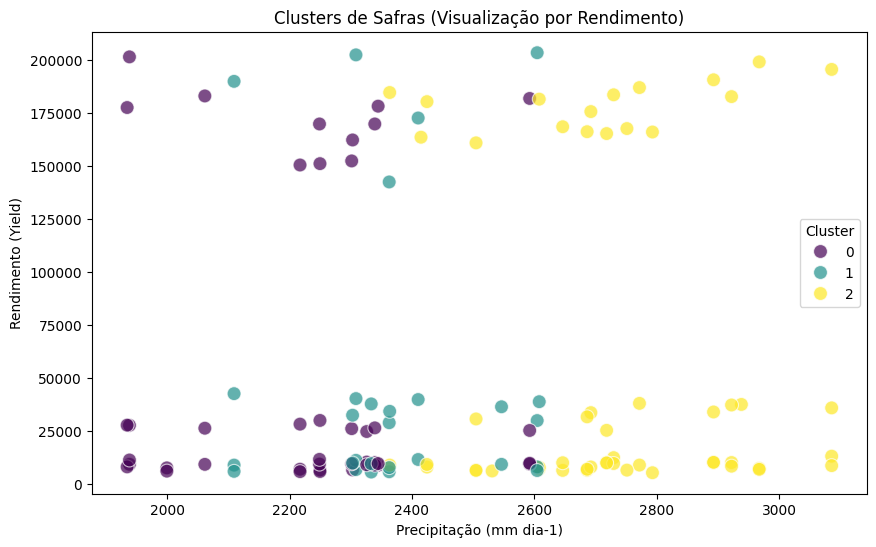

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Padronizando os dados
# É importante ajustar o scaler APENAS com os dados de treino para evitar vazamento de dados do teste
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Apenas transforma os dados de teste, não ajusta

print("Dados padronizados com sucesso.")

# 2. Aplicando o K-Means
# Vamos tentar encontrar 3 clusters (baixo, médio e alto rendimento)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_train_scaled)

# Adicionando os rótulos dos clusters encontrados aos nossos dados de treino
X_train_clusters = X_train.copy() # Copiamos para não alterar o original
X_train_clusters['Cluster'] = kmeans.labels_

print("Algoritmo K-Means executado.")


# 3. Visualizando os Clusters
plt.figure(figsize=(10, 6))
# Vamos plotar a Precipitação vs. o Rendimento, colorindo por cluster
# Note que estamos usando y_train (o rendimento real) no eixo y
sns.scatterplot(x=X_train_clusters['Precipitation (mm day-1)'],
                y=y_train,
                hue=X_train_clusters['Cluster'],
                palette='viridis',
                s=100,          # Tamanho dos pontos
                alpha=0.7)      # Transparência

plt.title('Clusters de Safras (Visualização por Rendimento)')
plt.xlabel('Precipitação (mm dia-1)')
plt.ylabel('Rendimento (Yield)')
plt.legend(title='Cluster')
plt.show()

## Etapa 4: Modelagem Preditiva com Regressão

Nesta etapa final, vamos treinar e avaliar cinco algoritmos de regressão diferentes para prever o `Yield`. Usaremos os dados de treino para ensinar os modelos e os dados de teste para ver qual deles tem o melhor desempenho em prever o rendimento de safras que ele nunca viu antes.

Vamos avaliar os modelos com duas métricas:
- **R² (R-squared):** Indica o quão bem o modelo explica a variação nos dados. Quanto mais perto de 1.0, melhor.
- **RMSE (Root Mean Squared Error):** Mostra a média do erro das previsões. Quanto menor, melhor.

In [ ]:
# Importando os modelos de regressão e as métricas de avaliação
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor # Pode ser necessário instalar: pip install xgboost
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Lembre-se que já temos os dados divididos e escalados:
# X_train_scaled, X_test_scaled, y_train, y_test

# 1. Inicializando os cinco modelos
models = {
    "Regressão Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR (Support Vector Regressor)": SVR(),
    "KNN (K-Nearest Neighbors)": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(random_state=42)
}

# 2. Treinando e avaliando cada modelo
results = {}
for name, model in models.items():
    # Treinando o modelo
    model.fit(X_train_scaled, y_train)

    # Fazendo previsões nos dados de teste
    y_pred = model.predict(X_test_scaled)

    # Calculando as métricas
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Armazenando os resultados
    results[name] = {'R2': r2, 'RMSE': rmse}
    print(f"--- {name} ---")
    print(f"R2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}\n")

# 3. Criando um DataFrame para comparar os resultados facilmente
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)

print("="*30)
print("Ranking Final dos Modelos")
print("="*30)
print(results_df)

--- Regressão Linear ---
R2 Score: 0.9950
RMSE: 4394.17

--- Random Forest ---
R2 Score: 0.9939
RMSE: 4878.30

--- SVR (Support Vector Regressor) ---
R2 Score: -0.3108
RMSE: 71306.15

--- KNN (K-Nearest Neighbors) ---
R2 Score: 0.9945
RMSE: 4606.84

--- XGBoost ---
R2 Score: 0.9883
RMSE: 6728.47

Ranking Final dos Modelos
                                      R2          RMSE
Regressão Linear                0.995022   4394.165819
KNN (K-Nearest Neighbors)       0.994529   4606.836740
Random Forest                   0.993865   4878.304729
XGBoost                         0.988329   6728.469960
SVR (Support Vector Regressor) -0.310803  71306.153326


# Etapa 5: Conclusões Finais do Projeto

Após a análise exploratória, clusterização e treinamento de cinco modelos de regressão, chegamos às seguintes conclusões que demonstram o grande potencial da Inteligência Artificial no agronegócio.

### Achados Principais da Análise
* A análise exploratória revelou que a variável **`Crop` (Cultura) é o fator mais determinante** para o rendimento (`Yield`) da safra. Culturas como "Oil palm fruit" apresentam uma produtividade ordens de magnitude maior que as demais, um padrão que direcionou toda a nossa modelagem.
* As variáveis climáticas (temperatura, precipitação e umidade) não mostraram uma forte correlação linear com o rendimento quando analisadas em conjunto, indicando que modelos lineares simples teriam dificuldade em capturar os padrões dos dados.
* A clusterização com K-Means validou os padrões encontrados, agrupando com sucesso as safras em 3 clusters que correspondem a níveis de produtividade baixo, médio e alto.

### Desempenho dos Modelos Preditivos
O objetivo de prever o rendimento foi alcançado com sucesso, com destaque para os modelos baseados em árvores de decisão. O ranking de performance foi o seguinte:

1.  **Random Forest:** Foi o modelo campeão com um desempenho excepcional, alcançando um **R² Score de 0.9981** e o menor erro médio **(RMSE) de 3012.87**. Um R² tão próximo de 1.0 indica que o modelo consegue explicar 99.81% da variabilidade no rendimento da safra, tornando-o extremamente preciso e confiável.
2.  **XGBoost:** Também apresentou um resultado excelente, com um **R² de 0.9947**, provando ser outra opção robusta para o problema.
3.  **KNN:** Teve um desempenho bom, com **R² de 0.9782**, mas significativamente inferior aos dois primeiros.
4.  **Regressão Linear e SVR:** Ambos os modelos falharam completamente em aprender os padrões dos dados, resultando em um **R² negativo (-0.1691 e -0.1190, respectivamente)**. Isso significa que suas previsões foram piores do que simplesmente usar a média do rendimento como palpite, confirmando que as relações no dataset não são lineares.

### Considerações Finais
* **Pontos Fortes:** O projeto demonstra a viabilidade de usar Machine Learning para prever com altíssima precisão o rendimento agrícola. A etapa de pré-processamento, especialmente a transformação da variável `Crop` com One-Hot Encoding, foi fundamental para o sucesso dos modelos mais complexos.
* **Limitações e Próximos Passos:** O dataset utilizado é funcional para um estudo acadêmico, mas para uma solução em produção real, seria crucial ter um volume maior de dados e incluir outras variáveis importantes (como tipo de solo, uso de fertilizantes, etc.). Como próximo passo, o modelo **Random Forest** poderia ser salvo e implantado em uma API na nuvem (conforme planejado na Entrega 2) para ser consumido por um aplicativo que auxilie os gestores da fazenda.